# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
print("__________________________________")

record_count = 1
set_count = 1

for i, city in enumerate (cities):
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=0
        
    city_url = url + city
    
    print("Processing record %s of set %s | %s" %(record_count, set_count, city))
    record_count+=1
    try:
        city_weather=requests.get(query_url + city).json()
        temperature=city_weather['main']['temp']
        humidity=city_weather['main']['humidity']
        cloudiness=city_weather['clouds']['all']
        wind_speed=city_weather['wind']['speed']
        city_lat=city_weather["coord"]["lat"]
        city_lon=city_weather["coord"]["lon"]
        city_country=city_weather["sys"]["country"]
        city_date=city_weather["dt"]
        city_data.append({"City":city,
                        "Lat":city_lat,
                        "Lng":city_lon,
                        "Max temp": temperature,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind_speed": wind_speed,
                        "Country": city_country,
                        "Date" : city_date})
    except:
            print("City not found. Skipping")
            pass
print("-------------------------------------")
print("Data retrival completed")
print("-------------------------------------")

Beginning Data Retrieval
__________________________________
Processing record 1 of set 1 | catalao
Processing record 2 of set 1 | provideniya
Processing record 3 of set 1 | airai
Processing record 4 of set 1 | raglan
Processing record 5 of set 1 | chokurdakh
Processing record 6 of set 1 | hasaki
Processing record 7 of set 1 | les escoumins
Processing record 8 of set 1 | makung
City not found. Skipping
Processing record 9 of set 1 | longhua
Processing record 10 of set 1 | east london
Processing record 11 of set 1 | rio grande
Processing record 12 of set 1 | castro
Processing record 13 of set 1 | rikitea
Processing record 14 of set 1 | sebezh
Processing record 15 of set 1 | jamestown
Processing record 16 of set 1 | busselton
Processing record 17 of set 1 | cape town
Processing record 18 of set 1 | barrow
Processing record 19 of set 1 | hobart
Processing record 20 of set 1 | birjand
Processing record 21 of set 1 | tuktoyaktuk
Processing record 22 of set 1 | esfarayen
Processing record 23 

Processing record 40 of set 4 | luanda
Processing record 41 of set 4 | bobo dioulasso
Processing record 42 of set 4 | amderma
City not found. Skipping
Processing record 43 of set 4 | sisimiut
Processing record 44 of set 4 | maloshuyka
City not found. Skipping
Processing record 45 of set 4 | mayya
Processing record 46 of set 4 | tiksi
Processing record 47 of set 4 | aklavik
Processing record 48 of set 4 | carnarvon
Processing record 49 of set 4 | tual
Processing record 0 of set 5 | saint marys
Processing record 1 of set 5 | lac du bonnet
Processing record 2 of set 5 | kununurra
Processing record 3 of set 5 | languyan
Processing record 4 of set 5 | salinas
Processing record 5 of set 5 | jertih
Processing record 6 of set 5 | lagoa
Processing record 7 of set 5 | eldikan
City not found. Skipping
Processing record 8 of set 5 | mujiayingzi
Processing record 9 of set 5 | sao joao da barra
Processing record 10 of set 5 | sagua la grande
Processing record 11 of set 5 | carutapera
Processing reco

Processing record 29 of set 8 | muyezerskiy
Processing record 30 of set 8 | kutum
Processing record 31 of set 8 | rungata
City not found. Skipping
Processing record 32 of set 8 | vryburg
Processing record 33 of set 8 | tondano
Processing record 34 of set 8 | raver
Processing record 35 of set 8 | jaltenango
Processing record 36 of set 8 | vilyuysk
Processing record 37 of set 8 | saint-augustin
Processing record 38 of set 8 | saint-paul
Processing record 39 of set 8 | acarau
Processing record 40 of set 8 | lompoc
Processing record 41 of set 8 | kochki
Processing record 42 of set 8 | hofn
Processing record 43 of set 8 | ambilobe
Processing record 44 of set 8 | nova olinda do norte
Processing record 45 of set 8 | moussoro
Processing record 46 of set 8 | beckley
Processing record 47 of set 8 | jackson
Processing record 48 of set 8 | whitianga
Processing record 49 of set 8 | lugazi
Processing record 0 of set 9 | cabedelo
Processing record 1 of set 9 | ingham
Processing record 2 of set 9 | ch

Processing record 21 of set 12 | khagrachari
City not found. Skipping
Processing record 22 of set 12 | vysokopillya
Processing record 23 of set 12 | comodoro rivadavia
Processing record 24 of set 12 | gat
Processing record 25 of set 12 | the pas
Processing record 26 of set 12 | pervomayskoye
Processing record 27 of set 12 | ukiah
Processing record 28 of set 12 | pandan
Processing record 29 of set 12 | mosquera
Processing record 30 of set 12 | arman
Processing record 31 of set 12 | chiltepec
Processing record 32 of set 12 | sioux lookout
Processing record 33 of set 12 | athens
Processing record 34 of set 12 | waw
Processing record 35 of set 12 | chumikan
Processing record 36 of set 12 | eatonton
Processing record 37 of set 12 | trairi
Processing record 38 of set 12 | hun
Processing record 39 of set 12 | tarbagatay
Processing record 40 of set 12 | manali
Processing record 41 of set 12 | formosa
Processing record 42 of set 12 | praxedis guerrero
Processing record 43 of set 12 | bay city
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind_speed,Country,Date
0,matay,28.42,30.78,15.34,51,19,3.84,EG,1609519501
1,ushuaia,-54.80,-68.30,13.00,82,90,3.35,AR,1609519501
2,mahebourg,-20.41,57.70,25.00,78,40,5.70,MU,1609519501
3,nouadhibou,20.93,-17.03,25.00,33,0,7.70,MR,1609519203
4,bluff,-46.60,168.33,12.78,97,99,2.24,NZ,1609519501


In [97]:
city_data_df=city_data_df.drop_duplicates(['City'] , keep ='first') 
city_data_df

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind_speed,Country,Date
0,matay,28.42,30.78,15.34,51,19,3.84,EG,1609519501
1,ushuaia,-54.80,-68.30,13.00,82,90,3.35,AR,1609519501
2,mahebourg,-20.41,57.70,25.00,78,40,5.70,MU,1609519501
3,nouadhibou,20.93,-17.03,25.00,33,0,7.70,MR,1609519203
4,bluff,-46.60,168.33,12.78,97,99,2.24,NZ,1609519501
...,...,...,...,...,...,...,...,...,...
1139,ulaanbaatar,47.91,106.88,-22.00,67,0,2.24,MN,1609532400
1141,warrnambool,-38.38,142.48,60.48,90,100,7.09,AU,1609532685
1142,otane,-39.88,176.63,71.01,66,91,2.04,NZ,1609532685
1143,tabas,33.60,56.92,35.60,37,0,2.24,IR,1609532685


In [98]:
city_data_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind_speed,Date
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,9.300000e+02
mean,20.922075,19.458333,25.751989,72.803226,54.193548,5.010462,1.609525e+09
std,31.234484,87.091133,30.464340,20.833054,39.655149,4.003041,6.429163e+03
min,-54.800000,-179.170000,-50.800000,10.000000,0.000000,0.250000,1.609519e+09
25%,-3.137500,-55.117500,4.270000,62.000000,4.000000,2.132500,1.609520e+09
50%,25.285000,24.740000,24.965000,78.000000,64.000000,4.000000,1.609520e+09
75%,47.572500,93.275000,39.002500,87.000000,91.000000,6.930000,1.609533e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,27.200000,1.609533e+09


In [99]:
city_data_df.shape

(930, 9)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data=city_data_df[(city_data_df["Humidity"] > 100)].index
dirty_city_data

Int64Index([], dtype='int64')

In [166]:
clean_city_data=city_data_df.drop(dirty_city_data, inplace=False)
clean_city_data=city_data_df.rename(columns={"Max temp":"Max Temp", "Wind_speed":"Wind Speed"})
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,matay,28.42,30.78,15.34,51,19,3.84,EG,1609519501
1,ushuaia,-54.80,-68.30,13.00,82,90,3.35,AR,1609519501
2,mahebourg,-20.41,57.70,25.00,78,40,5.70,MU,1609519501
3,nouadhibou,20.93,-17.03,25.00,33,0,7.70,MR,1609519203
4,bluff,-46.60,168.33,12.78,97,99,2.24,NZ,1609519501


In [167]:
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

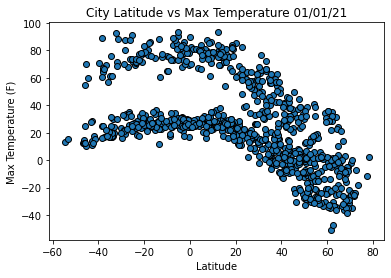

In [104]:
x_label=clean_city_data['Lat']
plt.scatter(x_label,clean_city_data['Max Temp'], edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature 01/01/21')
plt.show()

## Latitude vs. Humidity Plot

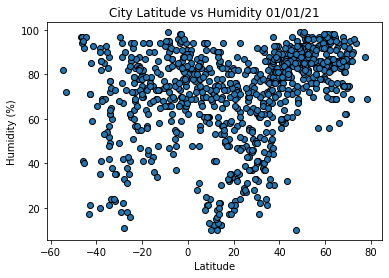

In [105]:
plt.scatter(x_label,clean_city_data['Humidity'], edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity 01/01/21')
plt.show()

## Latitude vs. Cloudiness Plot

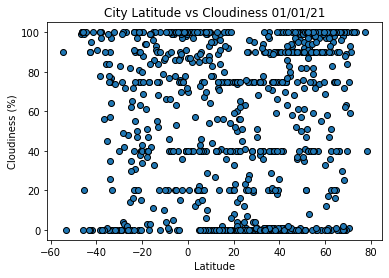

In [106]:
plt.scatter(x_label,clean_city_data['Cloudiness'], edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness 01/01/21')
plt.show()

## Latitude vs. Wind Speed Plot

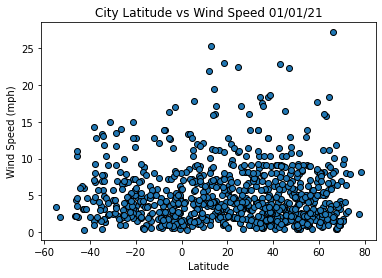

In [107]:
plt.scatter(x_label,clean_city_data['Wind Speed'], edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed 01/01/21')
plt.show()

## Linear Regression

In [168]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [169]:
northern_hemisphere_data = clean_city_data.drop(clean_city_data["Lat"].loc[
    (clean_city_data["Lat"] <= 0)].index)
northern_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,matay,28.42,30.78,15.34,51,19,3.84,EG,1609519501
3,nouadhibou,20.93,-17.03,25.00,33,0,7.70,MR,1609519203
6,yumen,40.28,97.20,-9.46,74,100,3.44,CN,1609519502
8,chokurdakh,70.63,147.92,-34.80,86,59,1.71,RU,1609519504
10,nemuro,43.32,145.57,-9.46,83,0,8.04,JP,1609519394
...,...,...,...,...,...,...,...,...,...
1137,severnyy,50.68,36.55,32.00,99,90,8.95,RU,1609532685
1138,tura,25.52,90.22,57.06,74,76,3.40,IN,1609532685
1139,ulaanbaatar,47.91,106.88,-22.00,67,0,2.24,MN,1609532400
1143,tabas,33.60,56.92,35.60,37,0,2.24,IR,1609532685


In [171]:
southern_hemisphere_data = clean_city_data.drop(clean_city_data["Lat"].loc[
    (clean_city_data["Lat"] > 0)].index)
southern_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ushuaia,-54.80,-68.30,13.00,82,90,3.35,AR,1609519501
2,mahebourg,-20.41,57.70,25.00,78,40,5.70,MU,1609519501
4,bluff,-46.60,168.33,12.78,97,99,2.24,NZ,1609519501
5,kavieng,-2.57,150.80,28.02,77,36,5.34,PG,1609519501
7,kindu,-2.95,25.95,21.20,95,100,0.87,CD,1609519504
...,...,...,...,...,...,...,...,...,...
1128,labrea,-7.26,-64.80,88.95,59,90,2.75,BR,1609532684
1130,waitati,-45.75,170.57,55.00,95,100,11.01,NZ,1609532684
1131,sunbury,-37.58,144.73,66.74,68,0,12.75,AU,1609532684
1141,warrnambool,-38.38,142.48,60.48,90,100,7.09,AU,1609532685


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.468567335978852


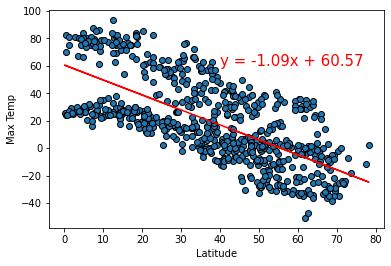

In [173]:
x_values=northern_hemisphere_data['Lat']
y_values=northern_hemisphere_data['Max Temp']
plot_linear_regression(x_values,y_values,'Max Temp',(40,60))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.019669896960740507


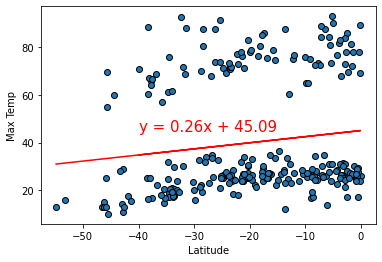

In [174]:
x_values=southern_hemisphere_data['Lat']
y_values=southern_hemisphere_data['Max Temp']
plot_linear_regression(x_values,y_values,'Max Temp',(-40,45))

* Based on r-values there is moderate uphill relationship between latitude and max temperature in the Northern hemisphere and no relationship between latitude and max temperature in the Southern hemisphere based on the temperature from 1/1/21.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1968007681551106


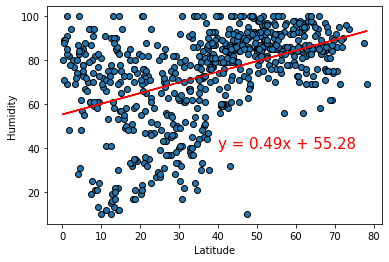

In [175]:
x_values=northern_hemisphere_data['Lat']
y_values=northern_hemisphere_data['Humidity']
plot_linear_regression(x_values,y_values,'Humidity',(40,40))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.047137633186790796


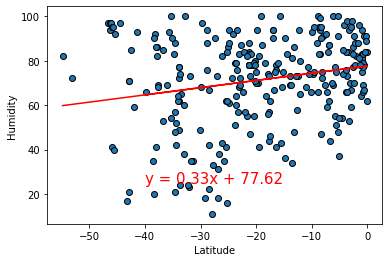

In [176]:
x_values=southern_hemisphere_data['Lat']
y_values=southern_hemisphere_data['Humidity']
plot_linear_regression(x_values,y_values,'Humidity',(-40,25))

* Based on r-values there is low uphill relationship between latitude and humidity in the Northern hemisphere and no relationship between latitude and humidity in the Southern hemisphere based on the data from 1/1/21.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04878855912651818


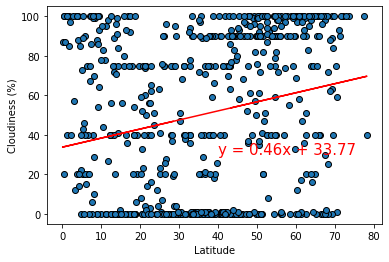

In [141]:
# Perform a linear regression on temperature vs. latitude
y_north_cloudiness=northern_hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_values, y_north_cloudiness)

# Get regression values
regress_values_north_cloudiness = x_north_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_north_values, y_north_cloudiness, edgecolors='k')
plt.plot(x_north_values,regress_values_north_cloudiness,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04357458874173757


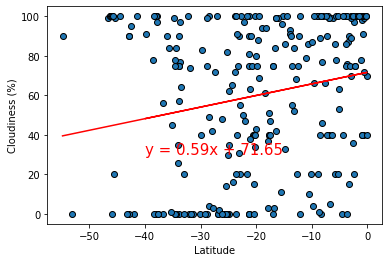

In [142]:
# Perform a linear regression on temperature vs. latitude
y_south_cloudiness=southern_hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_values, y_south_cloudiness)

# Get regression values
regress_values_south_cloudiness = x_south_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_south_values, y_south_cloudiness, edgecolors='k')
plt.plot(x_south_values,regress_values_south_cloudiness,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

* Based on r-values there is no relationship between latitude and cloudiness in both Northern and Southern hemispheres based on the data from 1/1/21.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009470265153987294


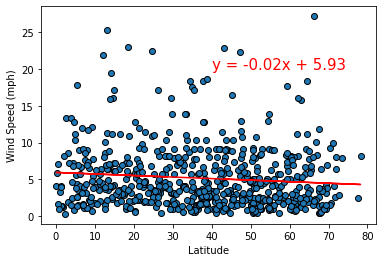

In [162]:
# Perform a linear regression on temperature vs. latitude
y_north_wind_speed=northern_hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_values, y_north_wind_speed)

# Get regression values
regress_values_north_wind_speed = x_north_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_north_values, y_north_wind_speed, edgecolors='k')
plt.plot(x_north_values,regress_values_north_wind_speed,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011214077464007974


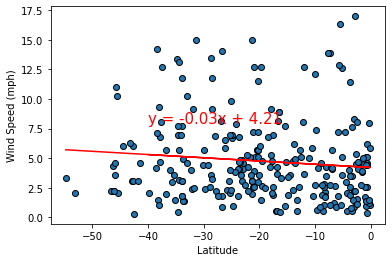

In [146]:
# Perform a linear regression on temperature vs. latitude
y_south_wind_speed=southern_hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_values, y_south_wind_speed)

# Get regression values
regress_values_south_wind_speed = x_south_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_south_values, y_south_wind_speed, edgecolors='k')
plt.plot(x_south_values,regress_values_south_wind_speed,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

* Based on r-values there is no relationship between latitude and wind speed in both Northern and Southern hemispheres based on the data from 1/1/21.